### importing necessary libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder

### 1. Business understanding 
MoonLight Energy Solutions aims to develop a strategic approach to significantly enhance its operational efficiency and sustainability through targeted solar investments
goal: to perform a quick analysis of an environmental measurement provided by the engineering team and translate your observation as a strategy report for the company

### 2. Data understanding
     - datasets  sources.
        -data source from: https://energydata.info/dataset/?q=Solar+Radiation+Measurement&vocab_regions=AFR

     -data structure and variable descriptions.
        -Each row in the data contains the values for solar radiation, air temperature, relative humidity, barometric pressure, precipitation, wind speed, and wind direction, cleaned and soiled radiance sensor (soiling measurement) and cleaning events.

#### => Describe data structure

In [3]:


data = '../data/togo_dapaong_qc.csv'  

try:
    # Load the CSV file
    df = pd.read_csv(data)
    print("Dataset loaded successfully. Shape:", df.shape)
except FileNotFoundError:
    print(f"Error: The file {data} was not found. Please provide the correct file path.")
    exit()
except Exception as e:
    print(f"Error loading CSV file: {e}")
    exit()

Dataset loaded successfully. Shape: (525600, 19)


In [4]:

print("Data Shape:", df.shape)

Data Shape: (525600, 19)


output: data have 525600 rows and 19 columns

In [5]:
print("First 5 rows of the dataset:")
print(df.head())


First 5 rows of the dataset:
          Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-10-25 00:01 -1.3  0.0  0.0   0.0   0.0  24.8  94.5  0.9     1.1   
1  2021-10-25 00:02 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.1     1.6   
2  2021-10-25 00:03 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.2     1.4   
3  2021-10-25 00:04 -1.2  0.0  0.0   0.0   0.0  24.8  94.3  1.2     1.6   
4  2021-10-25 00:05 -1.2  0.0  0.0   0.0   0.0  24.8  94.0  1.3     1.6   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.4  227.6      1.1  977         0            0.0   24.7   24.4   
1      0.4  229.3      0.7  977         0            0.0   24.7   24.4   
2      0.3  228.5      2.9  977         0            0.0   24.7   24.4   
3      0.3  229.1      4.6  977         0            0.0   24.7   24.4   
4      0.4  227.5      1.6  977         0            0.0   24.7   24.4   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4    

In [6]:
print("Last 5 rows of the dataset:")
print(df.tail())

Last 5 rows of the dataset:
               Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
525595  2022-10-24 23:56 -0.8  0.0  0.0   0.0   0.0  25.2  53.8  0.0     0.0   
525596  2022-10-24 23:57 -0.9  0.0  0.0   0.0   0.0  25.3  53.5  0.0     0.0   
525597  2022-10-24 23:58 -1.0  0.0  0.0   0.0   0.0  25.3  53.4  0.0     0.0   
525598  2022-10-24 23:59 -1.1  0.0  0.0   0.0   0.0  25.4  53.5  0.0     0.0   
525599  2022-10-25 00:00 -1.2  0.0  0.0   0.0   0.0  25.4  52.3  0.0     0.0   

        WSstdev   WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
525595      0.0  0.0      0.0  977         0            0.0   24.3   24.0   
525596      0.0  0.0      0.0  977         0            0.0   24.3   24.0   
525597      0.0  0.0      0.0  977         0            0.0   24.2   23.9   
525598      0.0  0.0      0.0  977         0            0.0   24.1   23.8   
525599      0.0  0.0      0.0  977         0            0.0   24.1   23.8   

        Comments  
525595   

In [7]:
#data information
print("\nData Informtion:")
print(df.info()) 


Data Informtion:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB      

#### Specifying numerical and categorical columns

In [8]:
print("\nSummary Statistics:")
print(df.describe()) # for numerical columns


Summary Statistics:
                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      230.555040     151.258469     116.444352     226.144375   
std       322.532347     250.956962     156.520714     317.346938   
min       -12.700000       0.000000       0.000000       0.000000   
25%        -2.200000       0.000000       0.000000       0.000000   
50%         2.100000       0.000000       2.500000       4.400000   
75%       442.400000     246.400000     215.700000     422.525000   
max      1424.000000    1004.500000     805.700000    1380.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      219.568588      27.751788      55.013160       2.368093   
std       307.932510       4.758023      28.778732       1.462668   
min         0.000000      14.900000       3.300000       0.000000   
25%         

In [9]:
#for categorical or boolean columns
print(df.describe(include=['object', 'category', 'bool']))


               Timestamp
count             525600
unique            525600
top     2022-10-24 23:44
freq                   1


In [10]:
print("\nSummary Statistics:")
print(df.describe()) # for numerical columns


Summary Statistics:
                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      230.555040     151.258469     116.444352     226.144375   
std       322.532347     250.956962     156.520714     317.346938   
min       -12.700000       0.000000       0.000000       0.000000   
25%        -2.200000       0.000000       0.000000       0.000000   
50%         2.100000       0.000000       2.500000       4.400000   
75%       442.400000     246.400000     215.700000     422.525000   
max      1424.000000    1004.500000     805.700000    1380.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      219.568588      27.751788      55.013160       2.368093   
std       307.932510       4.758023      28.778732       1.462668   
min         0.000000      14.900000       3.300000       0.000000   
25%         

#### =>Check for missing values

In [11]:
# print("\nMissing Values:")
# print(df.isnull().sum()) 

In [12]:
# df.ffill(inplace=True)
# df.dropna(inplace=True)  # dropping rows with missing values

In [13]:
print("\nSummary Statistics:")
print(df.describe()) # for numerical columns


Summary Statistics:
                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      230.555040     151.258469     116.444352     226.144375   
std       322.532347     250.956962     156.520714     317.346938   
min       -12.700000       0.000000       0.000000       0.000000   
25%        -2.200000       0.000000       0.000000       0.000000   
50%         2.100000       0.000000       2.500000       4.400000   
75%       442.400000     246.400000     215.700000     422.525000   
max      1424.000000    1004.500000     805.700000    1380.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      219.568588      27.751788      55.013160       2.368093   
std       307.932510       4.758023      28.778732       1.462668   
min         0.000000      14.900000       3.300000       0.000000   
25%         

#### =>Check for Duplicates


In [14]:
# print("\nNumber of Duplicate Rows:", df.duplicated().sum())

In [15]:
# and list any column with >5% nulls.

print("\nColumns with more than 5% null values:")
for col in df.columns:
    if df[col].isnull().sum() / len(df) > 0.05:
        print(f"{col}: {df[col].isnull().sum() / len(df) * 100:.2f}% null values")





Columns with more than 5% null values:
Comments: 100.00% null values


In [16]:
#Remove Duplicates
print("\nDuplicate rows before removal:", df.duplicated().sum())
df = df.drop_duplicates().reset_index(drop=True)
print("Duplicate rows after removal:", df.duplicated().sum())


Duplicate rows before removal: 0
Duplicate rows after removal: 0


In [17]:
print("\nSummary Statistics:")
print(df.describe()) # for numerical columns


Summary Statistics:
                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      230.555040     151.258469     116.444352     226.144375   
std       322.532347     250.956962     156.520714     317.346938   
min       -12.700000       0.000000       0.000000       0.000000   
25%        -2.200000       0.000000       0.000000       0.000000   
50%         2.100000       0.000000       2.500000       4.400000   
75%       442.400000     246.400000     215.700000     422.525000   
max      1424.000000    1004.500000     805.700000    1380.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      219.568588      27.751788      55.013160       2.368093   
std       307.932510       4.758023      28.778732       1.462668   
min         0.000000      14.900000       3.300000       0.000000   
25%         

In [18]:
#Check for Unique values in categorical columns
print("\nUnique Values in Categorical Columns:")
for col in ['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb','RH', 'WS', 'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation', 'TModA', 'TModB', 'Comments']:
    print(f"{col}: {df[col].nunique()} unique values - {df[col].unique()}")
    


Unique Values in Categorical Columns:
Timestamp: 525600 unique values - ['2021-10-25 00:01' '2021-10-25 00:02' '2021-10-25 00:03' ...
 '2022-10-24 23:58' '2022-10-24 23:59' '2022-10-25 00:00']
GHI: 8633 unique values - [-1.300e+00 -1.200e+00 -1.100e+00 ...  1.315e+03  1.213e+03  1.331e+03]
DNI: 9612 unique values - [  0.    4.2   3.  ... 342.9 260.  896.1]
DHI: 6841 unique values - [0.000e+00 2.000e-01 5.000e-01 ... 6.362e+02 6.644e+02 6.424e+02]
ModA: 10672 unique values - [0.0000e+00 1.0000e-01 2.0000e-01 ... 1.1712e+03 1.0865e+03 1.0691e+03]
ModB: 8439 unique values - [0.000e+00 1.000e-01 2.000e-01 ... 1.213e+03 1.290e+03 1.280e+03]
Tamb: 266 unique values - [24.8 24.9 25.  25.1 25.2 25.3 25.4 25.5 25.6 25.7 25.8 25.9 26.  26.1
 26.2 26.3 26.4 26.5 26.6 26.7 26.8 26.9 27.  27.1 27.2 27.3 27.4 27.5
 27.6 27.7 27.8 27.9 28.  28.1 28.2 28.3 28.4 28.5 28.6 28.7 28.8 28.9
 29.  29.1 29.2 29.3 29.4 29.5 29.6 29.7 29.8 29.9 30.  30.2 30.3 30.4
 30.5 30.6 30.7 30.8 30.9 31.  31.2 31.1 31.3

In [19]:
print("\nSummary Statistics:")
print(df.describe()) # for numerical columns


Summary Statistics:
                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      230.555040     151.258469     116.444352     226.144375   
std       322.532347     250.956962     156.520714     317.346938   
min       -12.700000       0.000000       0.000000       0.000000   
25%        -2.200000       0.000000       0.000000       0.000000   
50%         2.100000       0.000000       2.500000       4.400000   
75%       442.400000     246.400000     215.700000     422.525000   
max      1424.000000    1004.500000     805.700000    1380.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      219.568588      27.751788      55.013160       2.368093   
std       307.932510       4.758023      28.778732       1.462668   
min         0.000000      14.900000       3.300000       0.000000   
25%         

In [20]:
#outliers
print("\nOutliers:")
for col in ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb','RH', 'WS', 'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation', 'TModA', 'TModB', 'Comments']:
    print(f"{col}: {stats.zscore(df[col])}")


Outliers:
GHI: 0        -0.718859
1        -0.718859
2        -0.718859
3        -0.718549
4        -0.718549
            ...   
525595   -0.717309
525596   -0.717619
525597   -0.717929
525598   -0.718239
525599   -0.718549
Name: GHI, Length: 525600, dtype: float64
DNI: 0        -0.602727
1        -0.602727
2        -0.602727
3        -0.602727
4        -0.602727
            ...   
525595   -0.602727
525596   -0.602727
525597   -0.602727
525598   -0.602727
525599   -0.602727
Name: DNI, Length: 525600, dtype: float64
DHI: 0        -0.743956
1        -0.743956
2        -0.743956
3        -0.743956
4        -0.743956
            ...   
525595   -0.743956
525596   -0.743956
525597   -0.743956
525598   -0.743956
525599   -0.743956
Name: DHI, Length: 525600, dtype: float64
ModA: 0        -0.71261
1        -0.71261
2        -0.71261
3        -0.71261
4        -0.71261
           ...   
525595   -0.71261
525596   -0.71261
525597   -0.71261
525598   -0.71261
525599   -0.71261
Name: ModA, Lengt

In [21]:
#Compute Z-scores for GHI, DNI, DHI, ModA, ModB, WS, WSgust; flag rows with |Z|>3#
print("\nZ-scores:")
for col in ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb','RH', 'WS', 'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation', 'TModA', 'TModB', 'Comments']:
    print(f"{col}: {stats.zscore(df[col])}")


Z-scores:
GHI: 0        -0.718859
1        -0.718859
2        -0.718859
3        -0.718549
4        -0.718549
            ...   
525595   -0.717309
525596   -0.717619
525597   -0.717929
525598   -0.718239
525599   -0.718549
Name: GHI, Length: 525600, dtype: float64
DNI: 0        -0.602727
1        -0.602727
2        -0.602727
3        -0.602727
4        -0.602727
            ...   
525595   -0.602727
525596   -0.602727
525597   -0.602727
525598   -0.602727
525599   -0.602727
Name: DNI, Length: 525600, dtype: float64
DHI: 0        -0.743956
1        -0.743956
2        -0.743956
3        -0.743956
4        -0.743956
            ...   
525595   -0.743956
525596   -0.743956
525597   -0.743956
525598   -0.743956
525599   -0.743956
Name: DHI, Length: 525600, dtype: float64
ModA: 0        -0.71261
1        -0.71261
2        -0.71261
3        -0.71261
4        -0.71261
           ...   
525595   -0.71261
525596   -0.71261
525597   -0.71261
525598   -0.71261
525599   -0.71261
Name: ModA, Lengt

In [22]:
print("\nSummary Statistics:")
print(df.describe()) # for numerical columns


Summary Statistics:
                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      230.555040     151.258469     116.444352     226.144375   
std       322.532347     250.956962     156.520714     317.346938   
min       -12.700000       0.000000       0.000000       0.000000   
25%        -2.200000       0.000000       0.000000       0.000000   
50%         2.100000       0.000000       2.500000       4.400000   
75%       442.400000     246.400000     215.700000     422.525000   
max      1424.000000    1004.500000     805.700000    1380.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      219.568588      27.751788      55.013160       2.368093   
std       307.932510       4.758023      28.778732       1.462668   
min         0.000000      14.900000       3.300000       0.000000   
25%         

In [23]:
#Drop or impute (median) missing values in key columns.

drop_df = df.dropna(subset=['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb','RH', 'WS', 'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation', 'TModA', 'TModB', 'Comments'])  

In [24]:
print("\nSummary Statistics:")
print(drop_df.describe()) # for numerical columns


Summary Statistics:
       GHI  DNI  DHI  ModA  ModB  Tamb   RH   WS  WSgust  WSstdev   WD  \
count  0.0  0.0  0.0   0.0   0.0   0.0  0.0  0.0     0.0      0.0  0.0   
mean   NaN  NaN  NaN   NaN   NaN   NaN  NaN  NaN     NaN      NaN  NaN   
std    NaN  NaN  NaN   NaN   NaN   NaN  NaN  NaN     NaN      NaN  NaN   
min    NaN  NaN  NaN   NaN   NaN   NaN  NaN  NaN     NaN      NaN  NaN   
25%    NaN  NaN  NaN   NaN   NaN   NaN  NaN  NaN     NaN      NaN  NaN   
50%    NaN  NaN  NaN   NaN   NaN   NaN  NaN  NaN     NaN      NaN  NaN   
75%    NaN  NaN  NaN   NaN   NaN   NaN  NaN  NaN     NaN      NaN  NaN   
max    NaN  NaN  NaN   NaN   NaN   NaN  NaN  NaN     NaN      NaN  NaN   

       WDstdev   BP  Cleaning  Precipitation  TModA  TModB  Comments  
count      0.0  0.0       0.0            0.0    0.0    0.0       0.0  
mean       NaN  NaN       NaN            NaN    NaN    NaN       NaN  
std        NaN  NaN       NaN            NaN    NaN    NaN       NaN  
min        NaN  NaN       Na

In [25]:
print("\nSummary Statistics:")
print(df.describe()) # for numerical columns


Summary Statistics:
                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      230.555040     151.258469     116.444352     226.144375   
std       322.532347     250.956962     156.520714     317.346938   
min       -12.700000       0.000000       0.000000       0.000000   
25%        -2.200000       0.000000       0.000000       0.000000   
50%         2.100000       0.000000       2.500000       4.400000   
75%       442.400000     246.400000     215.700000     422.525000   
max      1424.000000    1004.500000     805.700000    1380.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      219.568588      27.751788      55.013160       2.368093   
std       307.932510       4.758023      28.778732       1.462668   
min         0.000000      14.900000       3.300000       0.000000   
25%         

In [26]:
#Save cleaned dataset to a new CSV file
output_file = '../data/togo_clean.csv'
df.to_csv(output_file, index=False)
print(f"\nCleaned dataset saved to {output_file}")


Cleaned dataset saved to ../data/togo_clean.csv


In [27]:
data = '../data/togo_clean.csv'  

try:
    # Load the CSV file
    cdf = pd.read_csv(data)
    print("Cleaned Dataset loaded successfully. Shape:", cdf.shape)
except FileNotFoundError:
    print(f"Error: The file {data} was not found. Please provide the correct file path.")
    exit()
except Exception as e:
    print(f"Error loading CSV file: {e}")
    exit()

Cleaned Dataset loaded successfully. Shape: (525600, 19)


In [28]:
#data information
print("\nData Informtion:")
print(cdf.info())


Data Informtion:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB      

### 3. Perform exploratory data analysis (EDA)

#### I. Univariate Analysis

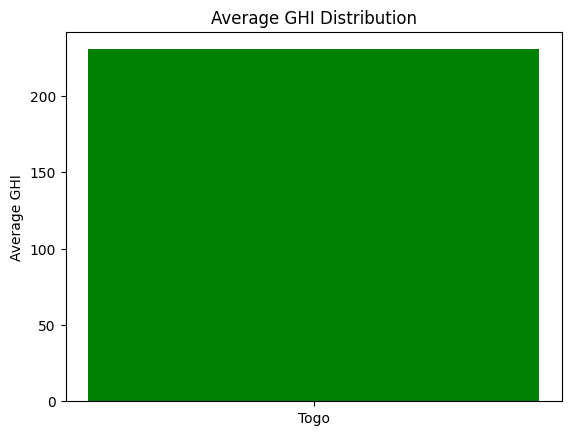

In [29]:
avg_ghi = [cdf['GHI'].mean()]
countries = [ 'Togo']

plt.bar(countries, avg_ghi, color=['green'])
plt.title('Average GHI Distribution')
plt.ylabel('Average GHI')
plt.show()

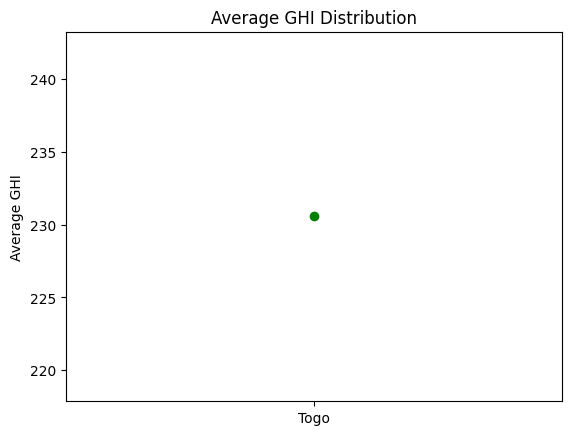

In [30]:
plt.plot(countries, avg_ghi, color='green', marker='o')
plt.title('Average GHI Distribution')
plt.ylabel('Average GHI')
plt.show()


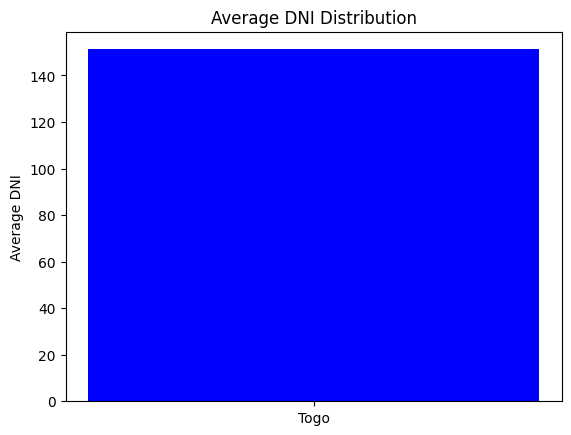

In [31]:
avg_ghi = [cdf['DNI'].mean()]
countries = [ 'Togo']

plt.bar(countries, avg_ghi, color=['blue'])
plt.title('Average DNI Distribution')
plt.ylabel('Average DNI')
plt.show()

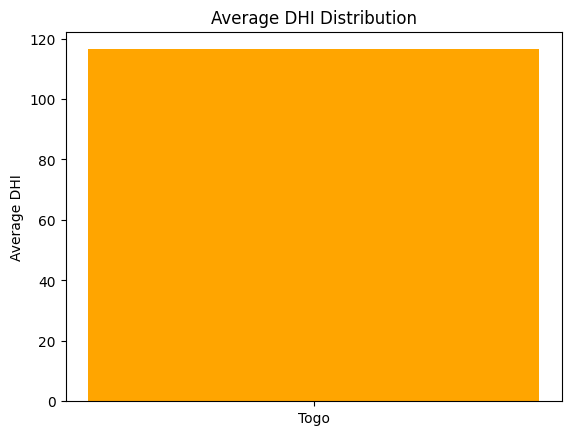

In [32]:
avg_ghi = [cdf['DHI'].mean()]
countries = [ 'Togo']

plt.bar(countries, avg_ghi, color=['orange'])
plt.title('Average DHI Distribution')
plt.ylabel('Average DHI')
plt.show()

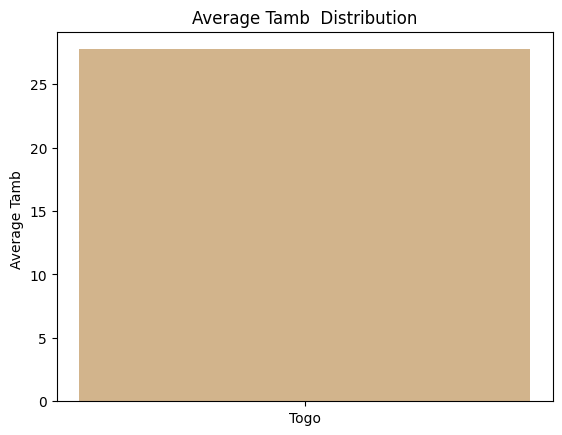

In [33]:
avg_ghi = [cdf['Tamb'].mean()]
countries = [ 'Togo']

plt.bar(countries, avg_ghi, color=['tan'])
plt.title('Average Tamb  Distribution')
plt.ylabel('Average Tamb ')
plt.show()

### pie chart for ModA status in Togo dataset

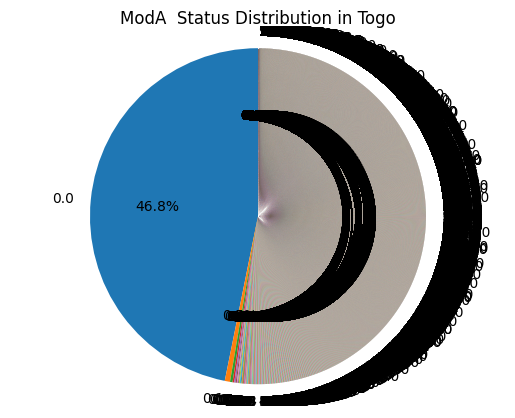

In [34]:
cleaning_counts = cdf['ModA'].value_counts()
plt.pie(cleaning_counts, labels=cleaning_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('ModA  Status Distribution in Togo')
plt.axis('equal')
plt.show()

### pie chart for ModB status in Togo dataset

In [35]:
cleaning_counts = cdf['ModB'].value_counts()
plt.pie(cleaning_counts, labels=cleaning_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('ModB  Status Distribution in Togo')
plt.axis('equal')
plt.show()

#### Histograms for GHI, DNI, DHI

Text(0.5, 1.0, 'DHI Distribution in Togo')

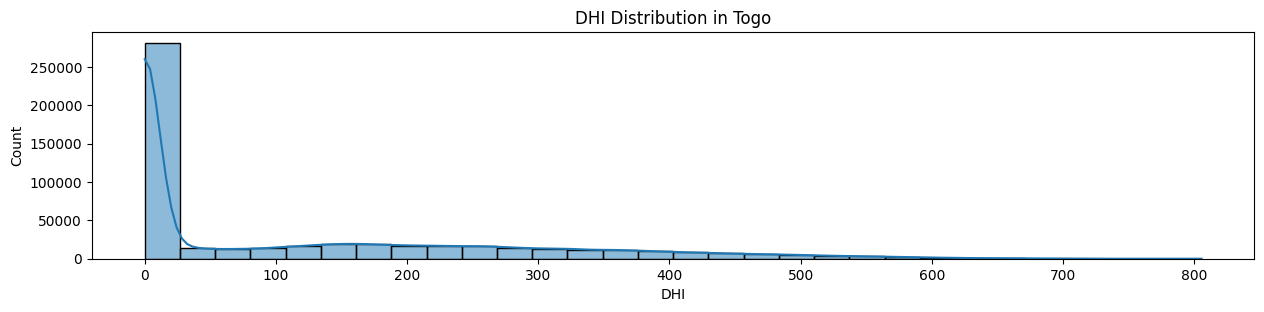

In [36]:
plt.figure(figsize=(15, 10))
plt.subplot(3, 1, 1)
sns.histplot(cdf['DHI'], bins=30, kde=True)
plt.title('DHI Distribution in Togo')


Text(0.5, 1.0, 'DNI Distribution in Togo')

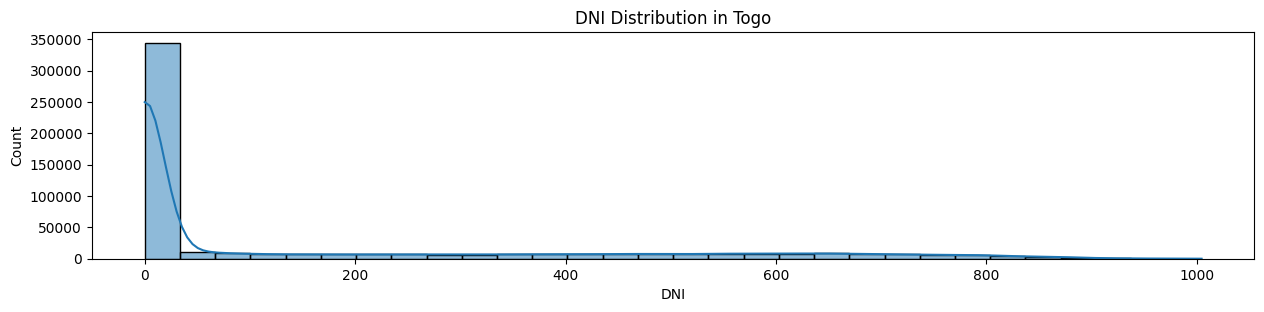

In [37]:
plt.figure(figsize=(15, 10))
plt.subplot(3, 1, 1)
sns.histplot(cdf['DNI'], bins=30, kde=True)
plt.title('DNI Distribution in Togo')

In [38]:
plt.figure(figsize=(10, 6))
sns.histplot(x=cdf['GHI'], bins=50, kde=True)
plt.title('Histogram of GHI in Togo')
plt.xlabel('GHI')
plt.ylabel('Frequency')
plt.show()

## Examining Relationships using Bivariate Analysis

### Scatter plot for GHI vs. Tamb

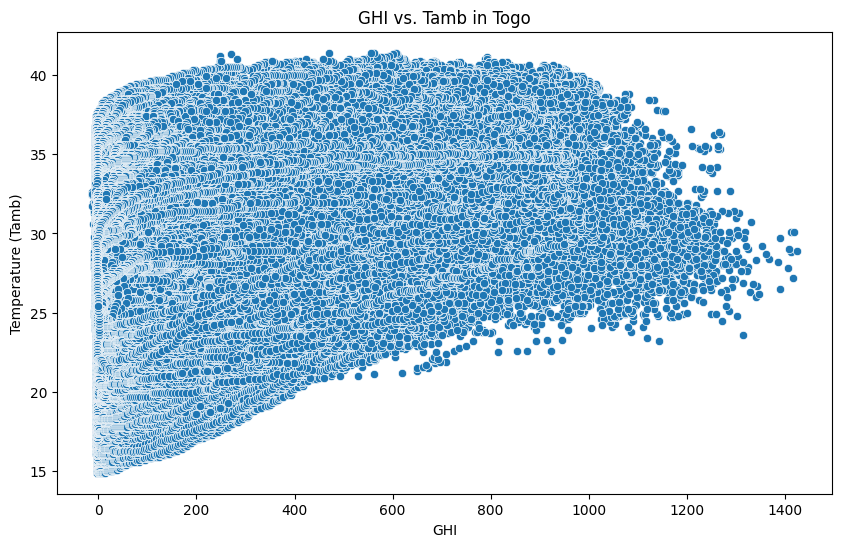

In [39]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=cdf['GHI'], y=cdf['Tamb'])
plt.title('GHI vs. Tamb in Togo')
plt.xlabel('GHI')
plt.ylabel('Temperature (Tamb)')
plt.show()

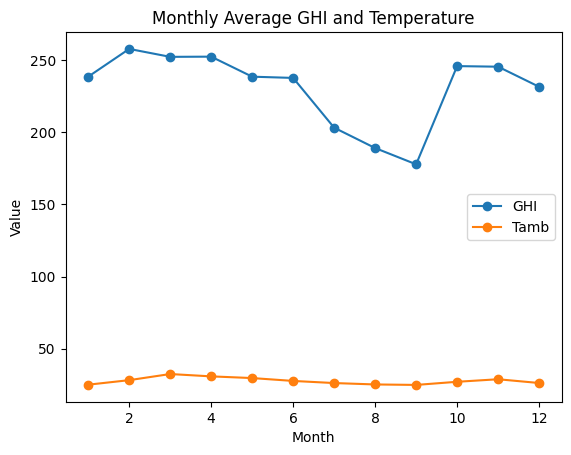

In [40]:
#Observe patterns by month, trends throughout day, or anomalies, such as peaks in solar irradiance or temperature fluctuations


# Convert Timestamp to datetime
cdf['Timestamp'] = pd.to_datetime(cdf['Timestamp'])

# Add month and hour columns
cdf['Month'] = cdf['Timestamp'].dt.month
cdf['Hour'] = cdf['Timestamp'].dt.hour

# Monthly average GHI and Tamb
monthly_avg = cdf.groupby('Month')[['GHI', 'Tamb']].mean()
monthly_avg.plot(kind='line', marker='o')
plt.title('Monthly Average GHI and Temperature')
plt.xlabel('Month')
plt.ylabel('Value')
plt.show()

# Hourly average GHI and Tamb
hourly_avg = cdf.groupby('Hour')[['GHI', 'Tamb']].mean()
hourly_avg.plot(kind='line', marker='o')
plt.title('Hourly Average GHI and Temperature')
plt.xlabel('Hour of Day')
plt.ylabel('Value')
plt.show()

# Identify anomalies: GHI peaks
plt.figure(figsize=(12, 4))
plt.plot(cdf['Timestamp'], cdf['GHI'], alpha=0.2)
plt.title('GHI Over Time')
plt.xlabel('Timestamp')
plt.ylabel('GHI')
plt.show()



## Correlation & Relationship Analysis

In [41]:
togo = cdf.drop(columns=["Timestamp"]) #since this data type  is date time column



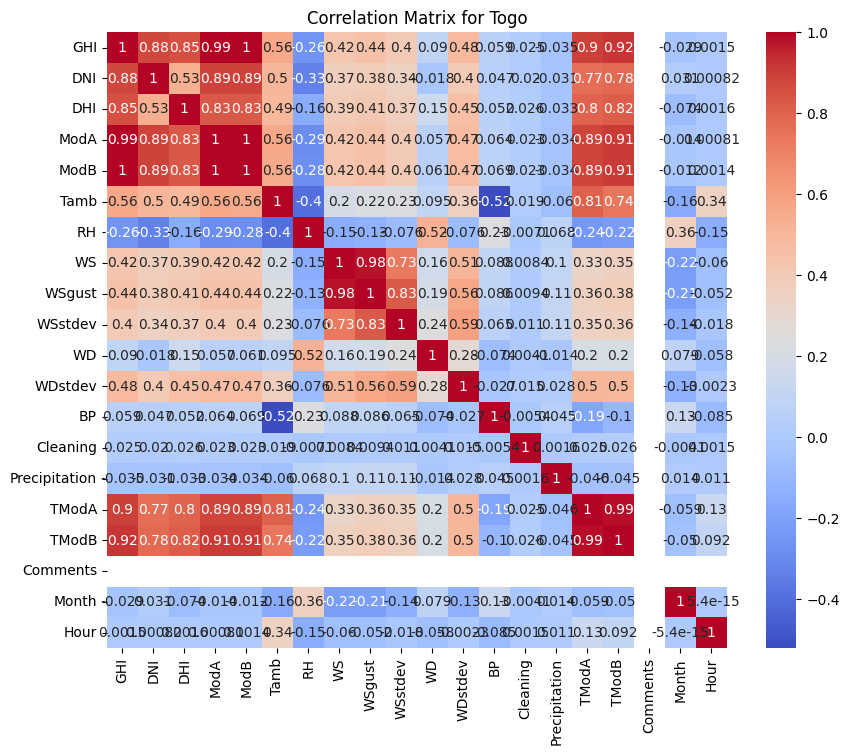

In [42]:
correlation_matrix = togo.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Togo')
plt.show()

In [43]:
# Scatter plots: WS, WSgust, WD vs. GHI; RH vs. Tamb or RH vs. GHI.

plt.figure(figsize=(18, 12))

# WS vs. GHI
plt.subplot(2, 3, 1)
sns.scatterplot(x=cdf['WS'], y=cdf['GHI'], alpha=0.3)
plt.title('WS vs. GHI')
plt.xlabel('WS')
plt.ylabel('GHI')

# WSgust vs. GHI
plt.subplot(2, 3, 2)
sns.scatterplot(x=cdf['WSgust'], y=cdf['GHI'], alpha=0.3)
plt.title('WSgust vs. GHI')
plt.xlabel('WSgust')
plt.ylabel('GHI')

# WD vs. GHI
plt.subplot(2, 3, 3)
sns.scatterplot(x=cdf['WD'], y=cdf['GHI'], alpha=0.3)
plt.title('WD vs. GHI')
plt.xlabel('WD')
plt.ylabel('GHI')

# RH vs. Tamb
plt.subplot(2, 3, 4)
sns.scatterplot(x=cdf['RH'], y=cdf['Tamb'], alpha=0.3)
plt.title('RH vs. Tamb')
plt.xlabel('RH')
plt.ylabel('Tamb')

# RH vs. GHI
plt.subplot(2, 3, 5)
sns.scatterplot(x=cdf['RH'], y=cdf['GHI'], alpha=0.3)
plt.title('RH vs. GHI')
plt.xlabel('RH')
plt.ylabel('GHI')

plt.tight_layout()
plt.show()


### Wind & Distribution Analysis

In [44]:

#Wind rose or radial bar plot of WS/WD.

# Prepare wind direction and speed data
ws = cdf['WS']
wd = cdf['WD']

# Convert wind direction from degrees to radians
wd_rad = np.deg2rad(wd)

# Create wind rose plot using polar coordinates
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
# Plot wind speed as a function of wind direction
sc = ax.scatter(wd_rad, ws, c=ws, cmap='viridis', alpha=0.5)
plt.title('Wind Rose: Wind Speed vs. Wind Direction')
plt.colorbar(sc, label='Wind Speed (m/s)')
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
plt.show()

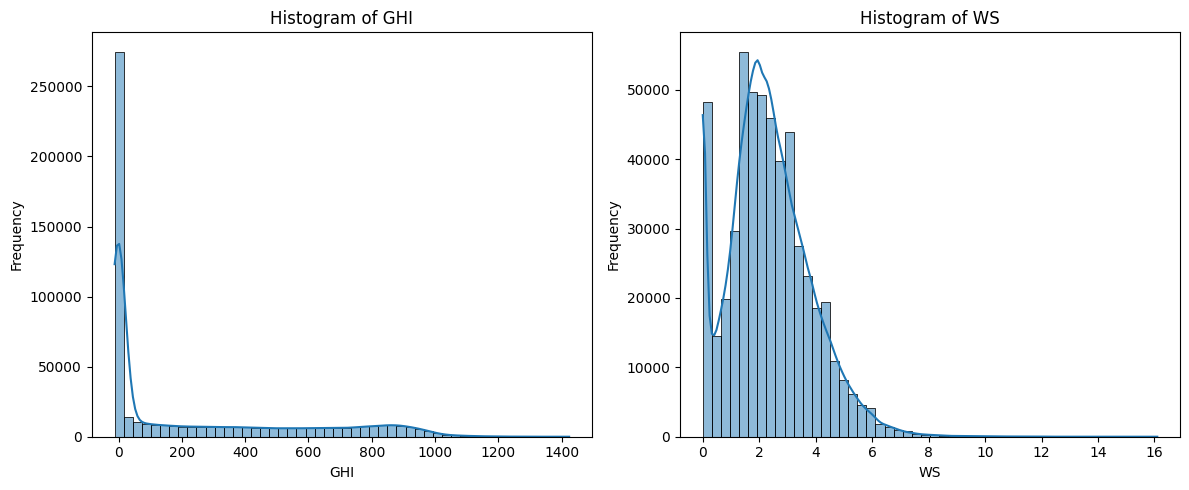

In [45]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(cdf['GHI'], bins=50, kde=True)
plt.title('Histogram of GHI')
plt.xlabel('GHI')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(cdf['WS'], bins=50, kde=True)
plt.title('Histogram of WS')
plt.xlabel('WS')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Temperature Analysis

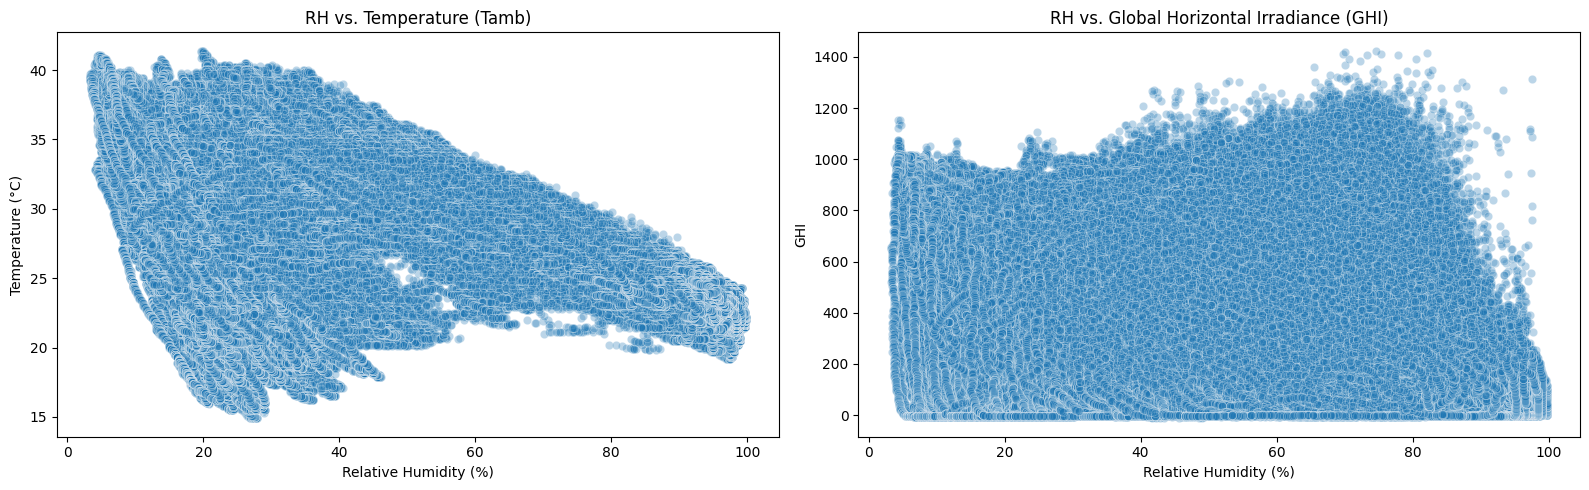

In [46]:
# Examine how relative humidity (RH) might influence temperature readings and solar radiation.

plt.figure(figsize=(16, 5))

# RH vs Tamb
plt.subplot(1, 2, 1)
sns.scatterplot(x=cdf['RH'], y=cdf['Tamb'], alpha=0.3)
plt.title('RH vs. Temperature (Tamb)')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Temperature (°C)')

# RH vs GHI
plt.subplot(1, 2, 2)
sns.scatterplot(x=cdf['RH'], y=cdf['GHI'], alpha=0.3)
plt.title('RH vs. Global Horizontal Irradiance (GHI)')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('GHI')

plt.tight_layout()
plt.show()

## Exploring Multiple Variables: using  Multivariate Analysis

### Pairplot for examining relationships among GHI, DHI, DNI, Tamb

In [47]:
sns.pairplot(cdf[['GHI', 'DHI', 'DNI', 'Tamb']])
plt.title('Pairplot for Togo Dataset')
plt.show()

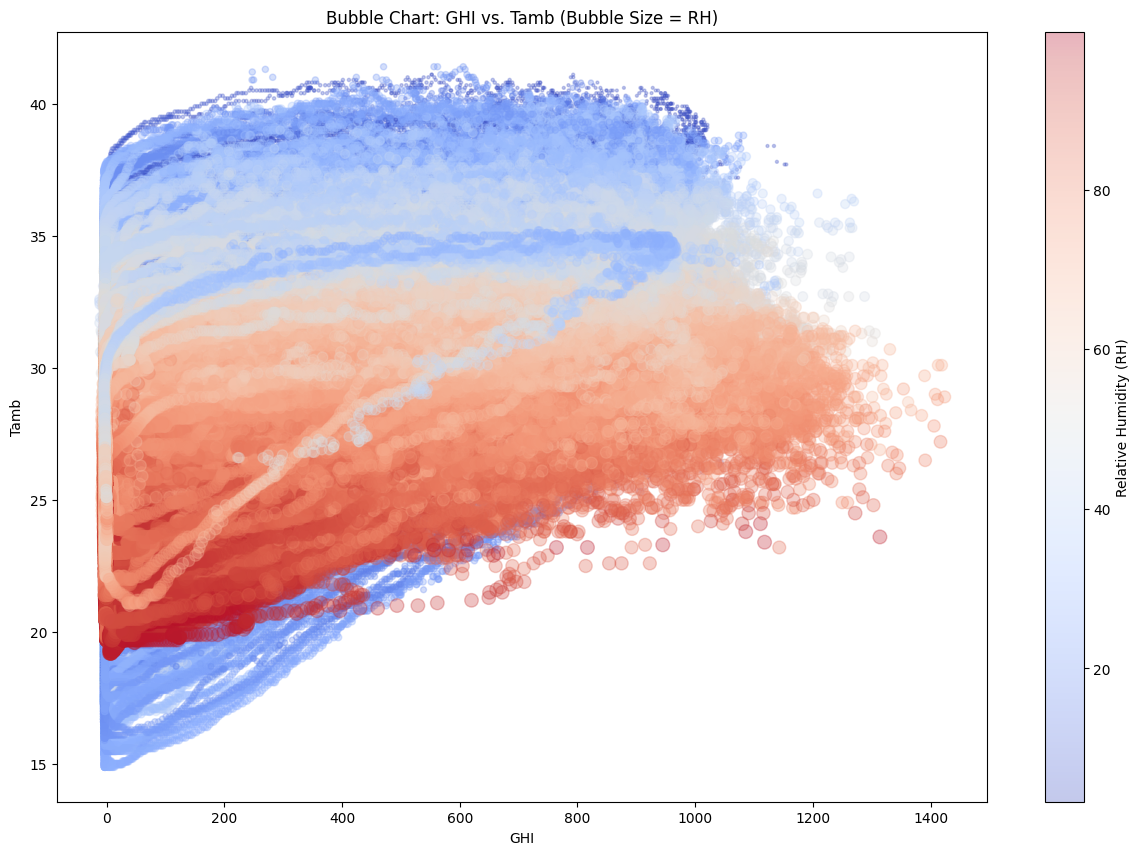

In [48]:
# Bubble Chart
# GHI vs. Tamb with bubble size = RH

plt.figure(figsize=(15, 10))
plt.scatter(cdf['GHI'], cdf['Tamb'], s=cdf['RH'], alpha=0.3, c=cdf['RH'], cmap='coolwarm')
plt.xlabel('GHI')
plt.ylabel('Tamb')
plt.title('Bubble Chart: GHI vs. Tamb (Bubble Size = RH)')
plt.colorbar(label='Relative Humidity (RH)')
plt.show()